In [13]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
from jax import grad
import jax
import numpy as np
import math
import keras
%matplotlib inline
from jaxmodel import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test model

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz", )
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

def batch(x, y, batch_size=32):
    if len(x) % batch_size != 0:
        x = x[:batch_size * (len(x)//batch_size)]
        y=y[:batch_size*(len(x)//batch_size)]
    return np.array_split(x, len(x) / batch_size, axis=0), np.array_split(y, len(y)/batch_size, axis=0)

def fix_data(x, y):
    x = x.reshape(x.shape[0], 28*28)/255
    test = np.zeros((x.shape[0], 10))
    test[np.arange(x.shape[0]),y] = 1
    return (x, test)

fixed_x, fixed_y = fix_data(x_train[:1000], y_train[:1000])
b_x , b_y = batch(fixed_x, fixed_y, 32)
x_test, y_test = batch(*fix_data(x_test, y_test))



In [ ]:
jaxmodel = JaxModel(28*28, 10, [ 8, 16], jax_mse, jax_sigmoid) 
datas = []
for _epoch in range(20):
    print(f"starting epoch {_epoch}")
    datas.append(jaxmodel.train_epoch(b_x, b_y,  (x_test, y_test), lr=1e-2 ))

starting epoch 0
Acc: 0.1875 Loss: 36.1034
starting epoch 1
Acc: 0.3125 Loss: 28.5651
starting epoch 2
Acc: 0.3750 Loss: 26.2446
starting epoch 3
Acc: 0.5000 Loss: 24.3099
starting epoch 4
Acc: 0.6250 Loss: 22.0661
starting epoch 5
Acc: 0.6250 Loss: 19.0463
starting epoch 6
Acc: 0.6875 Loss: 16.7944
starting epoch 7
Acc: 0.6875 Loss: 14.8231
starting epoch 8
Acc: 0.6875 Loss: 13.2295
starting epoch 9
Acc: 0.7188 Loss: 12.0155
starting epoch 10
Acc: 0.7188 Loss: 10.7511
starting epoch 11
Acc: 0.7500 Loss: 9.6738
starting epoch 12
Acc: 0.7188 Loss: 8.7935
starting epoch 13
Acc: 0.8438 Loss: 8.0130
starting epoch 14
Acc: 0.8438 Loss: 7.4154
starting epoch 15
Acc: 0.8750 Loss: 7.0053
starting epoch 16
Acc: 0.8438 Loss: 6.4726
starting epoch 17
Acc: 0.8438 Loss: 6.0184
starting epoch 18
Acc: 0.8750 Loss: 5.7295
starting epoch 19
Acc: 0.8750 Loss: 5.4015


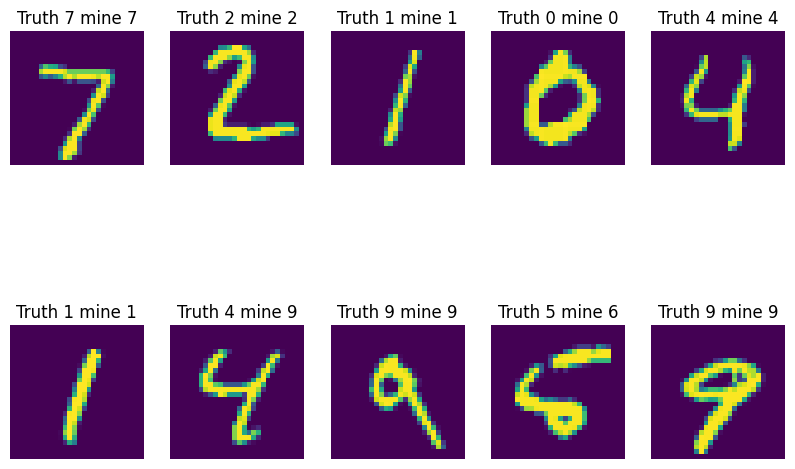

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

fig = plt.figure(figsize=(10, 7))
pic = 1
for i, img in enumerate(x_test[0][:10]):
  plt.subplot(2, 5, pic)
  plt.axis('off')
  predicted = jaxmodel.fd(jnp.array(img.flat))
  plt.title(f"Truth {np.argmax(y_test[0][i])} mine {jnp.argmax(predicted)}")
  plt.imshow(img.reshape(28, 28))
  pic+= 1
plt.show()

#As you can see the model has learnt to recognize numbers!